# Dominic Gnecco, 12/09/2024

The dataset I'm analyzing is a compilation of NFL team data from 2003 through 2023. I decided to explore a select few features which are the Year, Team Name, Win Rate, Point Differential, Offensive Yards per Play, Turnovers, First Downs, Passing Touchdowns, Passing Net Yards per Attempt, Rushing Touchdowns, Rushing Yards per Attempt, Penalties, and Penalty Yards.
The dataset can be found at the following knnk:
https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.inspection import PartialDependenceDisplay

# 1.1: EXPLORATORY DATA ANALYSIS (EDA)

    1. Load the dataset and display the first few rows to understand its structure.

In [4]:
# Import original dataset
initial_tstats = pd.read_csv('team_stats_2003_2023.csv')

# Select features to be explored (further reasoning in Data Cleaning section)
tstats = initial_tstats[['year', 'team', 'win_loss_perc', 'points_diff', 'yds_per_play_offense',
                         'turnovers', 'first_down', 'pass_td', 'pass_net_yds_per_att',
                         'rush_td', 'rush_yds_per_att', 'penalties', 'penalties_yds']]
tstats.to_csv("tstats.csv", index=False)
display(tstats.head())

,year,team,win_loss_perc,points_diff,yds_per_play_offense,turnovers,first_down,pass_td,pass_net_yds_per_att,rush_td,rush_yds_per_att,penalties,penalties_yds
0,2003,New England Patriots,0.875,110,4.8,24,294,23,6.0,9,3.4,111,998
1,2003,Miami Dolphins,0.625,50,4.8,34,266,17,5.8,14,3.7,103,913
2,2003,Buffalo Bills,0.375,-36,4.4,34,268,11,4.9,13,3.9,106,891
3,2003,New York Jets,0.375,-16,5.3,20,274,20,6.3,8,4.0,69,550
4,2003,Baltimore Ravens,0.625,110,4.9,38,259,16,4.9,18,4.8,126,970


    2. Analyze data distributions for numerical features

count     672.000000
mean     2013.000000
std         6.059811
min      2003.000000
25%      2008.000000
50%      2013.000000
75%      2018.000000
max      2023.000000
Name: year, dtype: float64


count                      672
unique                      37
top       New England Patriots
freq                        21
Name: team, dtype: object


count    672.000000
mean       0.500246
std        0.191452
min        0.000000
25%        0.375000
50%        0.500000
75%        0.625000
max        1.000000
Name: win_loss_perc, dtype: float64


count    672.000000
mean       0.000000
std      100.684601
min     -261.000000
25%      -75.000000
50%       -1.000000
75%       75.250000
max      315.000000
Name: points_diff, dtype: float64


count    672.000000
mean       5.340476
std        0.507939
min        3.900000
25%        5.000000
50%        5.300000
75%        5.700000
max        6.800000
Name: yds_per_play_offense, dtype: float64


count    672.000000
mean      24.708333
std        6

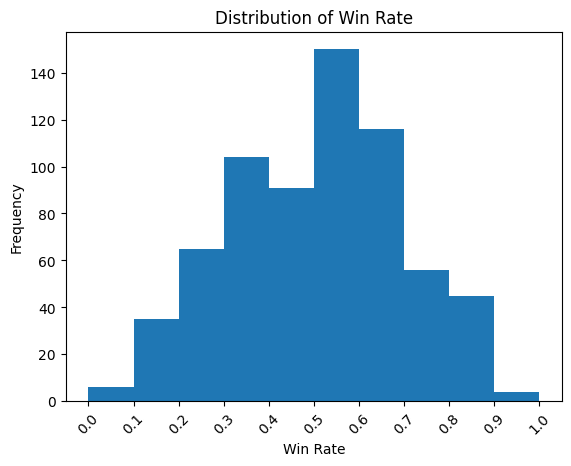

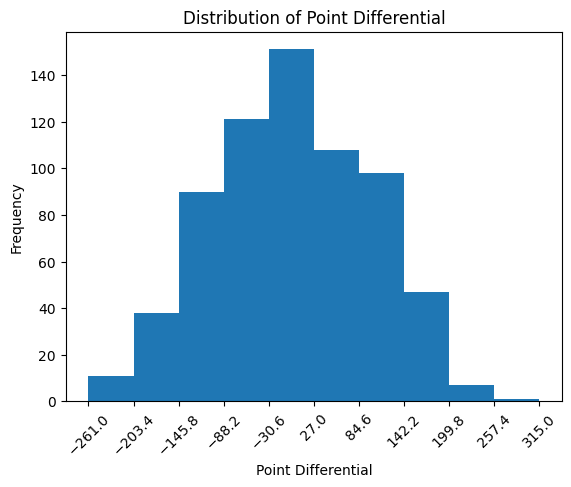

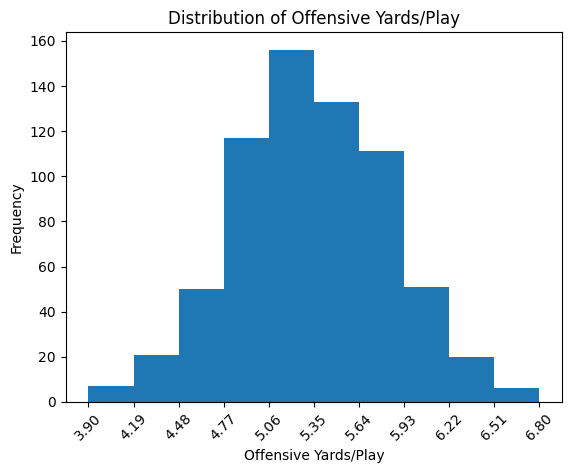

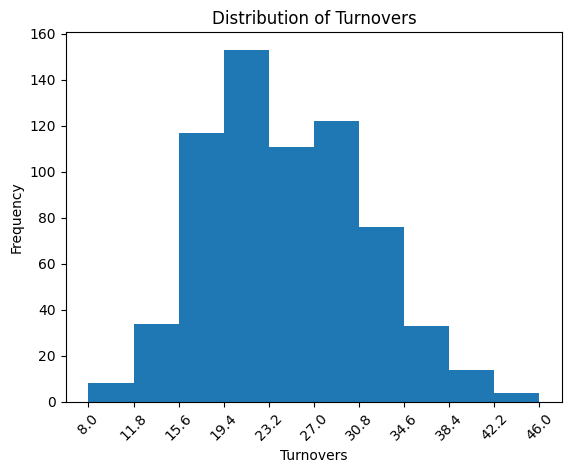

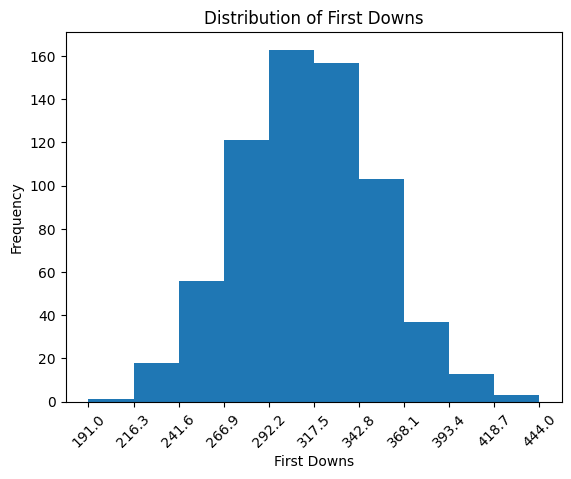

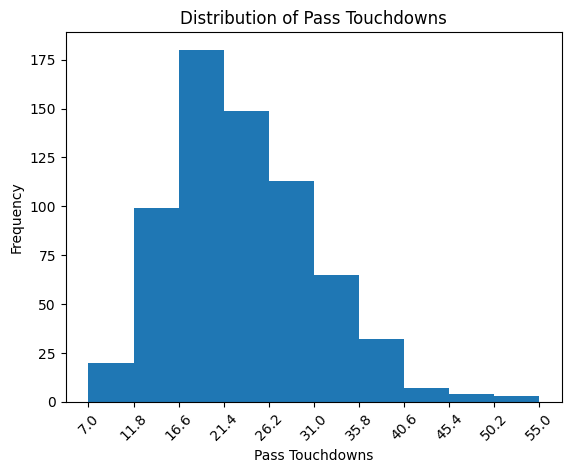

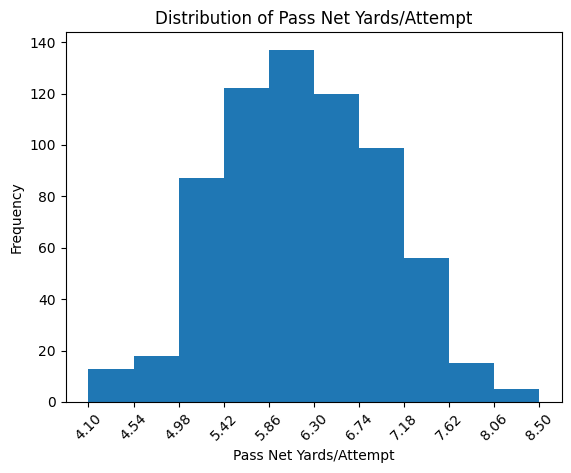

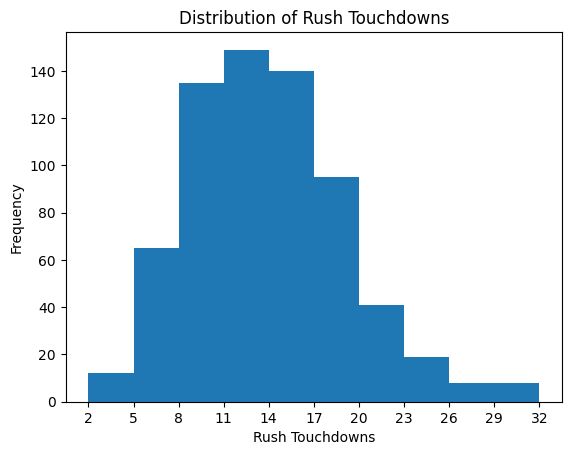

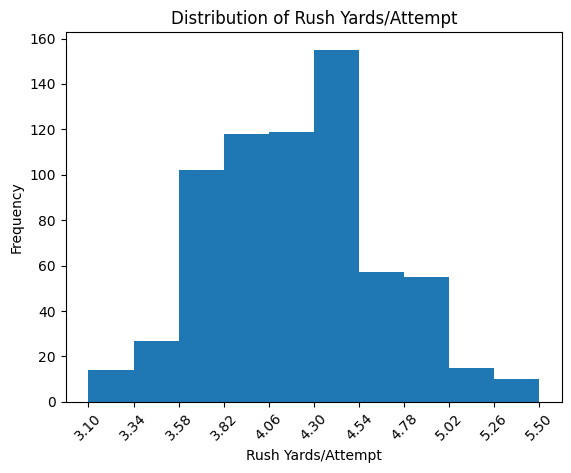

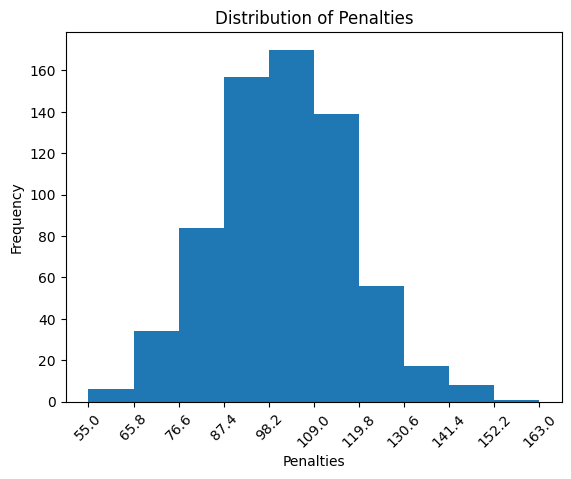

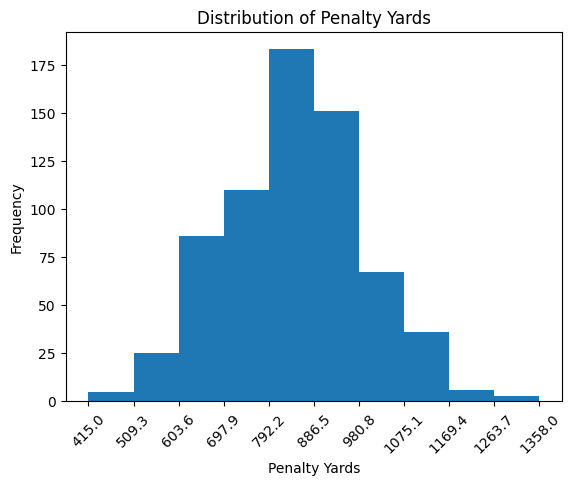

In [5]:
# Summary statistics
for feature in tstats.columns:
    print(tstats[feature].describe())
    print('\n')

# ***** VISUALIZATIONS *****
# Year and Team Name don't require visualizations

# Win Rate
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['win_loss_perc'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Win Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Win Rate')
plt.show()

# Point Differential
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['points_diff'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Point Differential')
plt.ylabel('Frequency')
plt.title('Distribution of Point Differential')
plt.show()

# Offensive Yards per Play
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['yds_per_play_offense'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Offensive Yards/Play')
plt.ylabel('Frequency')
plt.title('Distribution of Offensive Yards/Play')
plt.show()

# Turnovers
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['turnovers'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Turnovers')
plt.ylabel('Frequency')
plt.title('Distribution of Turnovers')
plt.show()

# First Downs
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['first_down'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('First Downs')
plt.ylabel('Frequency')
plt.title('Distribution of First Downs')
plt.show()

# Passing Touchdowns
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['pass_td'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Pass Touchdowns')
plt.ylabel('Frequency')
plt.title('Distribution of Pass Touchdowns')
plt.show()

# Passing Net Yards per Attempt (PNY/A)
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['pass_net_yds_per_att'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Pass Net Yards/Attempt')
plt.ylabel('Frequency')
plt.title('Distribution of Pass Net Yards/Attempt')
plt.show()

# Rushing Touchdowns
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['rush_td'])
plt.xticks(bin_edges)
plt.xlabel('Rush Touchdowns')
plt.ylabel('Frequency')
plt.title('Distribution of Rush Touchdowns')
plt.show()

# Rushing Yards per Attempt (RY/A)
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['rush_yds_per_att'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Rush Yards/Attempt')
plt.ylabel('Frequency')
plt.title('Distribution of Rush Yards/Attempt')
plt.show()

# Penalties
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['penalties'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Penalties')
plt.ylabel('Frequency')
plt.title('Distribution of Penalties')
plt.show()

# Penalty Yards
plt.figure()
counts, bin_edges, _ = plt.hist(tstats['penalties_yds'])
plt.xticks(bin_edges, rotation=45)
plt.xlabel('Penalty Yards')
plt.ylabel('Frequency')
plt.title('Distribution of Penalty Yards')
plt.show()

    3. Visualize relationships between variables

,year,win_loss_perc,points_diff,yds_per_play_offense,turnovers,first_down,pass_td,pass_net_yds_per_att,rush_td,rush_yds_per_att,penalties,penalties_yds
year,1.000000e+00,0.000164,-7.992015e-16,0.203307,-0.361114,0.381619,0.202175,0.116192,0.116206,0.161661,-0.052886,0.043672
win_loss_perc,1.644254e-04,1.000000,9.101897e-01,0.533387,-0.496408,0.513363,0.529191,0.617113,0.489719,0.119451,-0.112833,-0.064423
points_diff,-7.992015e-16,0.910190,1.000000e+00,0.593557,-0.495914,0.572918,0.587403,0.665717,0.543548,0.164288,-0.098427,-0.041639
yds_per_play_offense,2.033074e-01,0.533387,5.935568e-01,1.000000,-0.397751,0.752596,0.734402,0.928584,0.486679,0.430283,-0.014381,0.062084
turnovers,-3.611140e-01,-0.496408,-4.959138e-01,-0.397751,1.000000,-0.364356,-0.351616,-0.389215,-0.325889,-0.227521,0.086421,-0.002294
first_down,3.816185e-01,0.513363,5.729184e-01,0.752596,-0.364356,1.000000,0.708040,0.720373,0.494236,0.239291,-0.113987,-0.019552
pass_td,2.021748e-01,0.529191,5.874028e-01,0.734402,-0.351616,0.708040,1.000000,0.743478,0.129774,0.066017,-0.008216,0.051786
pass_net_yds_per_att,1.161918e-01,0.617113,6.657174e-01,0.928584,-0.389215,0.720373,0.743478,1.000000,0.429411,0.131239,-0.032889,0.032956
rush_td,1.162057e-01,0.489719,5.435481e-01,0.486679,-0.325889,0.494236,0.129774,0.429411,1.000000,0.509847,-0.151884,-0.088726
rush_yds_per_att,1.616613e-01,0.119451,1.642875e-01,0.430283,-0.227521,0.239291,0.066017,0.131239,0.509847,1.000000,-0.002336,0.043129



There appears to be strong correlations between the following features:
Win Rate and Point Differential , correlation of 0.910190
Offensive Yds/Play and Pass Net Yds/Att, correlation of 0.928584
Penalties and Penalty Yds, correlation of 0.907095

There also appears to be moderate correlations (0.70's) between each of:
Pass Net Yds/Att, First Down, Pass Tds, and Offensive Yds/Play



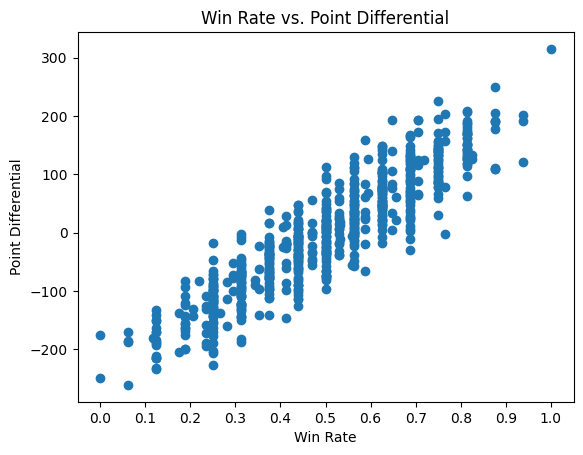

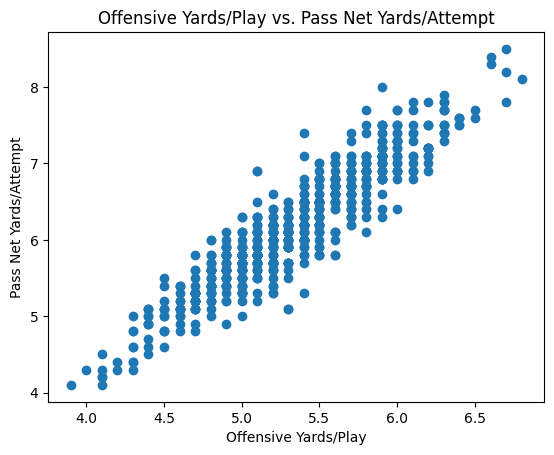

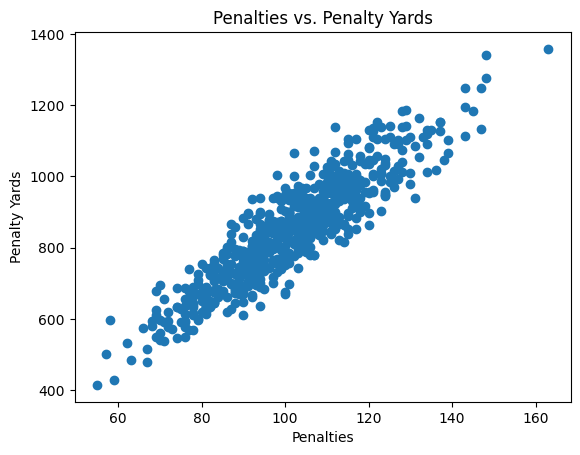

In [6]:
# Correlation matrix of numeric feature (categorical ones are transformed in Feature Engineering)
tstats_numeric = tstats.drop(columns=['team'])
correlation_matrix = tstats_numeric.corr()
display(correlation_matrix)

print("\nThere appears to be strong correlations between the following features:")
print("Win Rate and Point Differential , correlation of 0.910190")
print("Offensive Yds/Play and Pass Net Yds/Att, correlation of 0.928584")
print("Penalties and Penalty Yds, correlation of 0.907095")

print("\nThere also appears to be moderate correlations (0.70's) between each of:")
print("Pass Net Yds/Att, First Down, Pass Tds, and Offensive Yds/Play\n")

# ***** SCATTERPLOTS OF STRONGLY CORRELATED FEATURES *****
# Win Rate vs. Point Differential
plt.figure()
plt.scatter(tstats['win_loss_perc'], tstats['points_diff'])
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Win Rate')
plt.ylabel('Point Differential')
plt.title('Win Rate vs. Point Differential')
plt.show()

# Offensive Yds/Play vs. Pass Net Yds/Att
plt.figure()
plt.scatter(tstats['yds_per_play_offense'], tstats['pass_net_yds_per_att'])
plt.xlabel('Offensive Yards/Play')
plt.ylabel('Pass Net Yards/Attempt')
plt.title('Offensive Yards/Play vs. Pass Net Yards/Attempt')
plt.show()

# Penalties vs. Penalty Yds
plt.figure()
plt.scatter(tstats['penalties'], tstats['penalties_yds'])
plt.xlabel('Penalties')
plt.ylabel('Penalty Yards')
plt.title('Penalties vs. Penalty Yards')
plt.show()

    4. Identify any outliers or anomalies in the data

All of the histogram visualizations appear to be bell curves, with edge values fitting within the normal distribution. Therefore, there doesn't appear to be any data-skewing outliers in any of the features.

# 1.2: DATA CLEANING

    1. Identify and handle missing values

In [7]:
print("Out of the original dataset's features, I chose to only explore the ones I did due to a combination of redudancy and interest.")
print("Certain features are more accurate representations of others; Wins and Losses combine to make the Win Rate feature")

# Identify missing values
has_missing_values = False
for feature in tstats:
    missing_tstats = tstats[feature].isnull()
    if missing_tstats.sum() > 0:
        has_missing_values = True
        print('Feature '+feature+' has '+str(missing_tstats.sum())+' missing values')
if not has_missing_values:
    print("\nThere are no missing values in the dataset.")

Out of the original dataset's features, I chose to only explore the ones I did due to a combination of redudancy and interest.
Certain features are more accurate representations of others; Wins and Losses combine to make the Win Rate feature

There are no missing values in the dataset.


    2. Standardize data formats

In [8]:
# Check if any columns have inconsistent data types
print("The types of each column were determined in the summary statistics")
inconsistent_types = False
for feature in tstats.columns:
    feature_types = tstats[feature].apply(type)
    if feature_types.nunique() > 1:
        print("Feature"+feature+" has "+str(types.nunique())+" different types")
        inconsistent_types = True
if not inconsistent_types:
    print("All column data formats are consistent.")

The types of each column were determined in the summary statistics
All column data formats are consistent.


    3. Remove or address outliers identified in the EDA

As mentioned in the EDA, there were no identifiable outliers that needed to be addressed or removed.

# 1.3: FEATURE ENGINEERING

    1. Create new features that could enhance the predictive power of your models


In [9]:
# ***** INTERACTION TERMS *****
print("To handle multicollinearity, I decided to create interaction terms for each of the strongly correlated features")
# 1: Win Rate vs. Point Differential
print('\nHigher point differential has a linear relationship with win rate; the more points scored, the more likely to win')
tstats['WinRate_PointDiff'] = tstats['win_loss_perc'] * tstats['points_diff']
display(tstats['WinRate_PointDiff'])

# 2: Offensive Yds/Play vs. Pass Net Yds/Att
print('\nHigher yards/play has a linear relationship with net pass yards/attempt; each pass play is essentially a pass attempt')
tstats['YdsPerPlay_PassYdsPerAtt'] = tstats['yds_per_play_offense'] * tstats['pass_net_yds_per_att']
display(tstats['YdsPerPlay_PassYdsPerAtt'])

# 3:Penalties vs. Penalty Yds
print('\nMore penalties has a linear relationship with more penalty yards; more penalties would result in more penalty yards')
tstats['Pen_PenYds'] = tstats['penalties'] * tstats['penalties_yds']
display(tstats['Pen_PenYds'])

display(tstats.head())

To handle multicollinearity, I decided to create interaction terms for each of the strongly correlated features

Higher point differential has a linear relationship with win rate; the more points scored, the more likely to win


<ipython-input-9-a60dcf34c3d6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstats['WinRate_PointDiff'] = tstats['win_loss_perc'] * tstats['points_diff']


0       96.250
1       31.250
2      -13.500
3       -6.000
4       68.750
        ...   
667    -21.240
668    136.258
669     15.876
670    -20.102
671    -29.375
Name: WinRate_PointDiff, Length: 672, dtype: float64


Higher yards/play has a linear relationship with net pass yards/attempt; each pass play is essentially a pass attempt


<ipython-input-9-a60dcf34c3d6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstats['YdsPerPlay_PassYdsPerAtt'] = tstats['yds_per_play_offense'] * tstats['pass_net_yds_per_att']


0      28.80
1      27.84
2      21.56
3      33.39
4      24.01
       ...  
667    17.22
668    55.44
669    36.96
670    35.20
671    27.56
Name: YdsPerPlay_PassYdsPerAtt, Length: 672, dtype: float64


More penalties has a linear relationship with more penalty yards; more penalties would result in more penalty yards


<ipython-input-9-a60dcf34c3d6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstats['Pen_PenYds'] = tstats['penalties'] * tstats['penalties_yds']


0      110778
1       94039
2       94446
3       37950
4      122220
        ...  
667     87035
668     94233
669     64080
670    105894
671     86759
Name: Pen_PenYds, Length: 672, dtype: int64

,year,team,win_loss_perc,points_diff,yds_per_play_offense,turnovers,first_down,pass_td,pass_net_yds_per_att,rush_td,rush_yds_per_att,penalties,penalties_yds,WinRate_PointDiff,YdsPerPlay_PassYdsPerAtt,Pen_PenYds
0,2003,New England Patriots,0.875,110,4.8,24,294,23,6.0,9,3.4,111,998,96.25,28.80,110778
1,2003,Miami Dolphins,0.625,50,4.8,34,266,17,5.8,14,3.7,103,913,31.25,27.84,94039
2,2003,Buffalo Bills,0.375,-36,4.4,34,268,11,4.9,13,3.9,106,891,-13.50,21.56,94446
3,2003,New York Jets,0.375,-16,5.3,20,274,20,6.3,8,4.0,69,550,-6.00,33.39,37950
4,2003,Baltimore Ravens,0.625,110,4.9,38,259,16,4.9,18,4.8,126,970,68.75,24.01,122220


    2. Transform categorical variables into numerical ones

In [10]:
# Identify the unique team names
print("The team name feature has "+str(tstats['team'].nunique())+" values, it should have 32")
unique_names = tstats['team'].unique()
for name in unique_names:
    print(name)
print("Some team names have changed, but the data should be associated with them")

# Change the names
tstats['team'] = tstats['team'].replace('Oakland Raiders', 'Las Vegas Raiders')
tstats['team'] = tstats['team'].replace('San Diego Chargers', 'Los Angeles Chargers')
tstats['team'] = tstats['team'].replace('St. Louis Rams', 'Los Angeles Rams')
tstats['team'] = tstats['team'].replace('Washington Redskins', 'Washington Commanders')
tstats['team'] = tstats['team'].replace('Washington Football Team', 'Washington Commanders')
# Double check that the values were changed
print("The team name feature now has "+str(tstats['team'].nunique())+" values.")

# Encode each team with a number
tstats_names = tstats['team']
ordinal_encoder = OrdinalEncoder()
tstats['team'] = pd.DataFrame(ordinal_encoder.fit_transform(tstats[['team']]),columns=['team'])
display(tstats['team'])
print('\nTeam name feature was encoded with the following key:')
display(pd.DataFrame(sorted(tstats_names.unique()), columns=["Team Name"]))

The team name feature has 37 values, it should have 32
New England Patriots
Miami Dolphins
Buffalo Bills
New York Jets
Baltimore Ravens
Cincinnati Bengals
Pittsburgh Steelers
Cleveland Browns
Indianapolis Colts
Tennessee Titans
Jacksonville Jaguars
Houston Texans
Kansas City Chiefs
Denver Broncos
Oakland Raiders
San Diego Chargers
Philadelphia Eagles
Dallas Cowboys
Washington Redskins
New York Giants
Green Bay Packers
Minnesota Vikings
Chicago Bears
Detroit Lions
Carolina Panthers
New Orleans Saints
Tampa Bay Buccaneers
Atlanta Falcons
St. Louis Rams
Seattle Seahawks
San Francisco 49ers
Arizona Cardinals
Los Angeles Rams
Los Angeles Chargers
Las Vegas Raiders
Washington Football Team
Washington Commanders
Some team names have changed, but the data should be associated with them


<ipython-input-10-03b4b0a1ea5f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstats['team'] = tstats['team'].replace('Oakland Raiders', 'Las Vegas Raiders')
<ipython-input-10-03b4b0a1ea5f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstats['team'] = tstats['team'].replace('San Diego Chargers', 'Los Angeles Chargers')
<ipython-input-10-03b4b0a1ea5f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

The team name feature now has 32 values.


<ipython-input-10-03b4b0a1ea5f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstats['team'] = pd.DataFrame(ordinal_encoder.fit_transform(tstats[['team']]),columns=['team'])


0      21.0
1      19.0
2       3.0
3      24.0
4       2.0
       ... 
667     4.0
668    27.0
669    18.0
670    28.0
671     0.0
Name: team, Length: 672, dtype: float64


Team name feature was encoded with the following key:


,Team Name
0,Arizona Cardinals
1,Atlanta Falcons
2,Baltimore Ravens
3,Buffalo Bills
4,Carolina Panthers
5,Chicago Bears
6,Cincinnati Bengals
7,Cleveland Browns
8,Dallas Cowboys
9,Denver Broncos


    3. Normalize or standardize numerical features

All of the numerical features were roughly normal bell curves, so I don't believe normalization or standardization is necessary.

# 2.1 MODEL SELECTION

    1. Research and select appropriate machine learning models based on your data and problem type 

The feature I want to predict is Win Rate (win_loss_perc), which would be a regression problem. To accomplish this, I chose the Random Forests regression model; I also decided to explore the differences in Multiple and KNN Regression Models

    2. Justify your model choices

From the EDA, only the Point Differential (points_diff) feature has a strong linear relationship with Win Rate; This indicates the dataset has more complex relationships, which Random Forests would be better at handling. Random Forests are more resource-demanding and less interpretable; However, computational resources aren't an issue, and evaluating accuracy of the results is more important than interpreting how the model makes its decisions (for this assignment). I also want to explore features other than points_diff that I believe might be good predictors, so I decided to initially train the model using the Turnovers feature as well. Additionally, I decided to add a new combined feature, Total Touchdowns (tot_td), as the separation of Rushing/Passing TDs isn't a good representation of the metric.


# 2.2 MODEL TRAINING

    1. Split the dataset into training and testing sets

In [11]:
# New combined feature
tstats['tot_td'] = tstats['rush_td'] + tstats['pass_td']

# Get features used in model
X = tstats[['points_diff', 'turnovers', 'tot_td']]
y = tstats['win_loss_perc']

# Split into training/testing
print("Split data into 80/20 training/testing")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print('Number of set instances: '+str(len(X_train))+'/'+str(len(X_test)))

<ipython-input-11-940381e95489>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tstats['tot_td'] = tstats['rush_td'] + tstats['pass_td']


Split data into 80/20 training/testing
Number of set instances: 537/135


    2. Train your selected models on the training set, use techniques such as cross-validation to optimize model parameters

In [12]:
print("I am training the models by both fitting the training data and cross-validating it with 10-fold cross-validation.")

# Define models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
lin_model = LinearRegression()
knn_model = KNeighborsRegressor(n_neighbors=7)

# Fit models
rf_model.fit(X_train, y_train)
lin_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Cross-validate models
cv_results_rf = cross_validate(rf_model, X_train, y_train, cv=10)
cv_results_lin = cross_validate(lin_model, X_train, y_train, cv=10)
cv_results_knn = cross_validate(knn_model, X_train, y_train, cv=10)

I am training the models by both fitting the training data and cross-validating it with 10-fold cross-validation.


# 2.3 MODEL EVALUATION

    1. Evaluate model performance using suitable metrics 

In [13]:
# Random Forest metrics 
print("Random Forest metrics:")
print('MAE:', metrics.mean_absolute_error(y_test, rf_model.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, rf_model.predict(X_test)))
print('RMSE:', metrics.root_mean_squared_error(y_test, rf_model.predict(X_test)))
print('R2:', metrics.r2_score(y_test, rf_model.predict(X_test)))
print('Cross-Validated R2:', np.mean(cv_results_rf['test_score']))

# Multiple Regression metrics 
print("\nMultiple Regression metrics:")
print('MAE:', metrics.mean_absolute_error(y_test, lin_model.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lin_model.predict(X_test)))
print('RMSE:', metrics.root_mean_squared_error(y_test, lin_model.predict(X_test)))
print('R2:', metrics.r2_score(y_test, lin_model.predict(X_test)))
print('Cross-Validated R2:', np.mean(cv_results_lin['test_score']))

# K-Nearest Neighbor metrics 
print("\nK-Nearest Neighbor metrics:")
print('MAE:', metrics.mean_absolute_error(y_test, knn_model.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, knn_model.predict(X_test)))
print('RMSE:', metrics.root_mean_squared_error(y_test, knn_model.predict(X_test)))
print('R2:', metrics.r2_score(y_test, knn_model.predict(X_test)))
print('Cross-Validated R2:', np.mean(cv_results_knn['test_score']))

Random Forest metrics:
MAE: 0.0697266666666667
MSE: 0.007662790928888895
RMSE: 0.08753736875694228
R2: 0.7865105066980589
Cross-Validated R2: 0.7740684977427977

Multiple Regression metrics:
MAE: 0.06658763103361032
MSE: 0.006540517877828019
RMSE: 0.08087346831828111
R2: 0.8177776399450507
Cross-Validated R2: 0.8250656849592055

K-Nearest Neighbor metrics:
MAE: 0.06989947089947088
MSE: 0.007267430234315946
RMSE: 0.08524922424465776
R2: 0.797525469149621
Cross-Validated R2: 0.7960158005391996


    2. Compare the performance of different models and justify your findings

Overall, all models performed decently well and very similarly, but the Multiple Regression model was the best in every single category. On average, the MR model predictions deviated from observed Win Rate by 0.0809; in terms of number of wins, this equates to slightly more than one game (17 game season). Additionally, the MR model accounts for 81.78% of Win Rate variance, with it being the only model to have an R2 value > 0.8; the cross-validated MR model has an even better R2 score of 0.8251. Despite my prediction, the Random Forest model performed the worst, having a higher RMSE and lower R2 score than both the KNN and the MR models. While all models produced similar metrics, I will stick with the Multiple Regression model.

    3. Visualize results using appropriate plots 

Due to this being a regression problem, I'll use both prediction error and partial dependence plots.


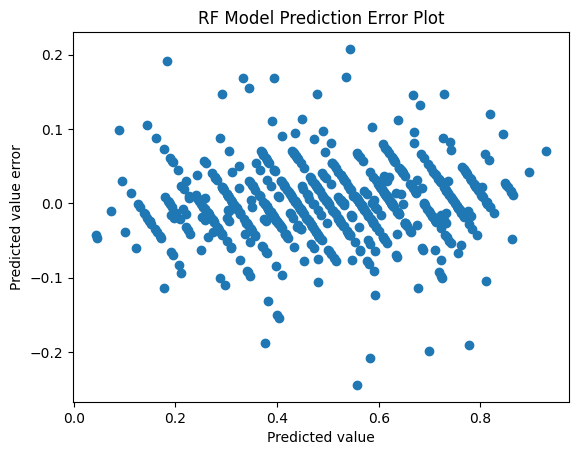

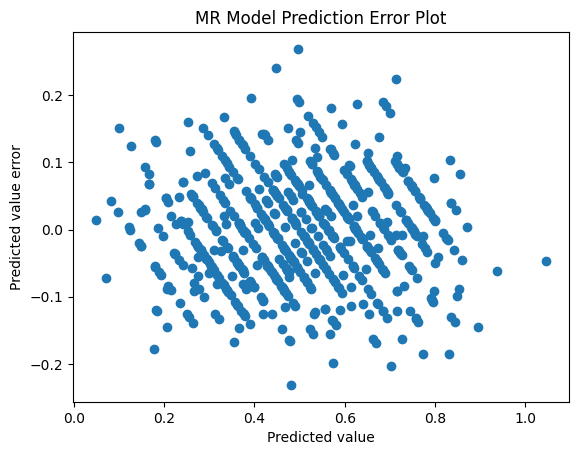

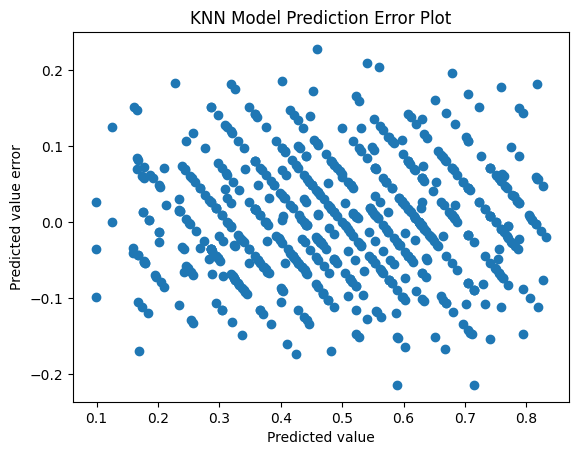

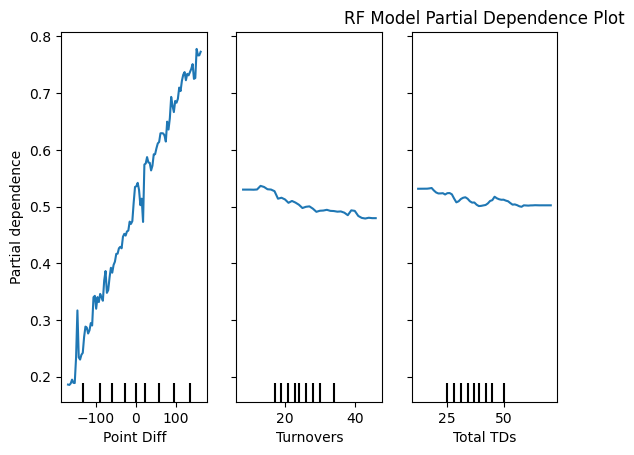

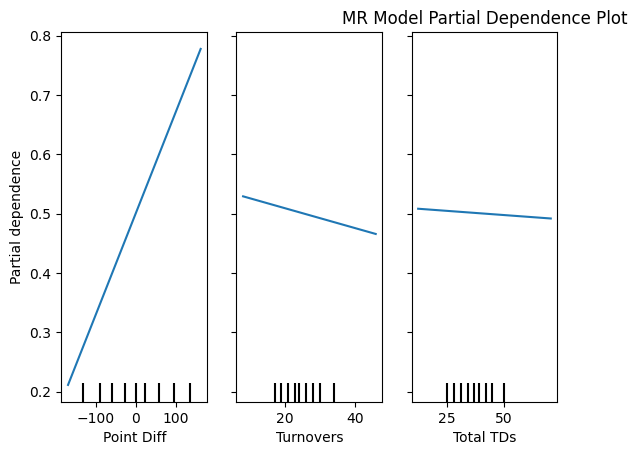

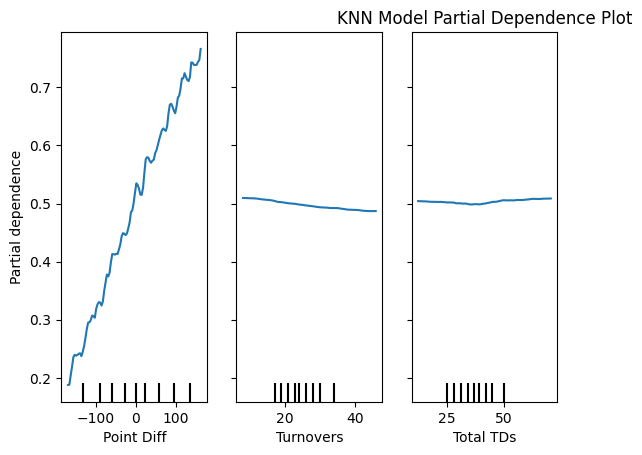

All models had relatively randomly distributed points on their prediction error plots, with the KNN model having the most random distribution.
Additionally, all models were most dependent on the Point Diff feature by far, with the other two features having a slight decline as instance values increased.


In [14]:
print("Due to this being a regression problem, I'll use both prediction error and partial dependence plots.")

# ***** PREDICTION ERROR PLOTS *****
# RF Model
rf_pred = rf_model.predict(X)
rf_error = y - rf_pred
plt.figure()
plt.scatter(rf_pred, rf_error)
plt.xlabel('Predicted value')
plt.ylabel('Predicted value error')
plt.title('RF Model Prediction Error Plot')
plt.show()

# MR Model
lin_pred = lin_model.predict(X)
lin_error = y - lin_pred
plt.figure()
plt.scatter(lin_pred, lin_error)
plt.xlabel('Predicted value')
plt.ylabel('Predicted value error')
plt.title('MR Model Prediction Error Plot')
plt.show()

# KNN Model
knn_pred = knn_model.predict(X)
knn_error = y - knn_pred
plt.figure()
plt.scatter(knn_pred, knn_error)
plt.xlabel('Predicted value')
plt.ylabel('Predicted value error')
plt.title('KNN Model Prediction Error Plot')
plt.show()

# ***** PARTIAL DEPENDENCE PLOTS *****
# RF Model
PartialDependenceDisplay.from_estimator(rf_model, X, features = [0, 1, 2], feature_names = ['Point Diff', 'Turnovers', 'Total TDs'])
plt.title('RF Model Partial Dependence Plot')
plt.show()

# MR Model
PartialDependenceDisplay.from_estimator(lin_model, X, features = [0, 1, 2], feature_names = ['Point Diff', 'Turnovers', 'Total TDs'])
plt.title('MR Model Partial Dependence Plot')
plt.show()

# KNN Model
PartialDependenceDisplay.from_estimator(knn_model, X, features = [0, 1, 2], feature_names = ['Point Diff', 'Turnovers', 'Total TDs'])
plt.title('KNN Model Partial Dependence Plot')
plt.show()

# Interpretation
print("All models had relatively randomly distributed points on their prediction error plots, with the KNN model having the most random distribution.")
print("Additionally, all models were most dependent on the Point Diff feature by far, with the other two features having a slight decline as instance values increased.")

# 3.1 FINAL MODEL PERFORMANCE ANALYSIS

    1. Analyze the performance of final model chosen

Overall, the model performed very well; the in-depth individual performance metric values were calculated and displayed in Section 2.3, but the multiple regression model specifically had a RMSE of 0.0809 and R^2 score of 0.8251. The strong performance is indicated by the model's low RMSE and high R^2 score, with the model accounting for >80% of variance and deviating from observed win rate by slightly more than one game (with each game accounting for around 0.0588 of total win rate). Additional performance analysis can be found in Step 2 of Section 2.3.

    2. Comparative analysis with alternative models

In Section 2.2, I already trained both KNN and Random Forest regression models in supplement of the final chosen Multiple Regression model; the individual performance metric values of the other two models can also be found in Section 2.3. All of the models performed very similarly, having a RMSE differential (between the best and worst model) of only 0.0067, and a R^2 score differential of only 0.0386. While I initially believed the Random Forest model would perform the best, the MR model had both the lowest RMSE and highest R^2 score, leading me to choose it over the other options. The KNN model had the second lowest RMSE and second highest R^2 score, and the RF model performing the worst. Additional comparative analysis can be found in Steps 2 and 3 of Section 2.3.

    3. Discuss limitations of the model and potential areas for improvement

Despite the strong accuracy scores, the model can absolutely be adjusted to improve them. I'd say the weakest area for improvement would be the feature selection process, as I feel like I could have done better to grasp/implement the intricacies of evaluating which features to include in the model. While some analysis like multicollinearity checking was useful, there absolutely could be hidden insights in features that I missed, and the model might perform better without a feature or two that I did include. To quantify this, I could train multiple models with different features from the dataset and evaluate their performances, which would highlight the most important features. Additionally, because of the lack of identifiable outliers, I didn't perform any standardization/normalization apart from categorical encoding; training the models on datasets with better normalization/standardization could potentially improve their accuracy.

# 3.2 DEPLOYMENT PLAN

    1. Outline a detailed deployment architecture

Assuming the model is only trained on the current dataset not continuously retrained on team data from new seasons (2024 onward), the deployment architecture would be relatively simple. For the model, I would save it using pickle to a .pkl file, which would just be hosted on a local server that I would start when I need to make a prediction (for permanent deployment, I can use a service like AWS). For the data pipelines, all three input features (point diff, turnovers, total tds) are integers, and the user-inputted data can directly be fed into the parameters for sklearn's predict method; none of the three input features were standardized/normalized or encoded, so the parameter values would just be the exact inputs. For the monitoring systems, I would include appropriate error handling to ensure input values are correct and wouldn't break the model; I would also implement some form of input overflow control to prevent the server from crashing. Finally, for the user interface, I would just have an small screen with three labeled input boxes (for the different integer inputs), a submit button to send the values, and an output box to display the predicted win rate from the model.

    2. Simulate a mock deployment with a description of the process

The local server containing the model is manually started, loading the model into the application's memory and prompting the user with the interface. The user then inputs a point differential value into the first box, the number of turnovers into the second box, and the total number of touchdowns into the third box. The user then clicks the submit button, which saves the values to the application and inputs them to the predict() method for the model. Finally, the resulting win rate prediction output is then populated into the output box on the user interface.

    3. Discuss considerations such as scalability, maintenance, and compliance with legal regulations

For scalability, this wouldn't be an issue in the single-use local deployment scenario. However, if this were to be deployed on a permanent server for multiple people to use, I might consider using a different model to reduce complexity or adding multiple servers if there are significantly more users; additionally, as mentioned, I would have built-in prevantative measures for large data values. For maintenance, I could continuously retrain the model each year when new team data releases, which would account for potential new trends. Finally, for legal compliance, due to the training data being entirely public, the only main concern is user data privacy; I would ensure that the input/output values from users aren't saved permanently and are encrypted (for instance, using https).

# 3.3 ETHICAL CONSIDERATIONS

    1. Conduct an in-depth analysis of the ethical implications of your project

As mentioned, the data used for the model is entirely publicly available, and further data released by teams will always be public. Thankfully, this mitigates the ethical problems related to sensitivity of personal data and bias/discrimination for the data in the dataset. Additionally, the functionality of the model has little broader societal impact; the stakeholders using the model would be insignificant, as the model only provides a predicted win rate for a hypothetical NFL team. The primary ethical concern would be the use of the model for sports betting purposes, but the model itself provides little insight for that purpose, as the input data would already be taken for a completed season.

    2. Provide recommendations for ensuring fairness, accountability, and compliance with regulations

The data represents publicly available statistics for teams of a leisure activity that have otherwise zero meaning; as such, ensuring fairness is unnecessary, as there are no implicit biases that need to be mitigated. For accountability, how the model works can simply be disclosed or documented so that others are aware of its functionality. Finally, as mentioned, user data will be unsaved and encrypted, so regulations regarding user privacy will be kept.